<h1>Customer churn prediction</h1>

<h2>Setup</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

<h2>Data collection, cleaning, and exploration</h2>

In [2]:
#import data, and display the first 5 entries
df = pd.read_csv('telco_customer_churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# remove irrelavant columns
df = df.drop(columns=['customerID'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#Converting Object column to Numerical Column, which is actually holds Numerical data
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Drop null values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
#Removing 0 tunure 
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)


In [9]:
# Convert Gender data to numeric values 0/1: 0: Male, 1: Female
df['gender'] = df['gender'].map({"Male": 0, "Female": 1})

In [10]:
# Convert all yes/no data to numeric values 0/1: 0: No, 1: Yes
mapping = {"Yes": 1, "No": 0}
df['Churn'] = df['Churn'].map(mapping)
df['Partner'] = df['Partner'].map(mapping)
df['Dependents'] = df['Dependents'].map(mapping)
df['PhoneService'] = df['PhoneService'].map(mapping)
df['PaperlessBilling'] = df['PaperlessBilling'].map(mapping)

In [11]:
# Convert other data of 'object' type to numerical values
mapping2 = {"Yes": 1, "No": 0, "No internet service": 0}
df['OnlineSecurity'] = df['OnlineSecurity'].map(mapping2)
df['DeviceProtection'] = df['DeviceProtection'].map(mapping2)
df['TechSupport'] = df['TechSupport'].map(mapping2)
df['StreamingTV'] = df['StreamingTV'].map(mapping2)
df['StreamingMovies'] = df['StreamingMovies'].map(mapping2)

In [12]:
# Convert 'MultipleLines' data to numeric values 0/1: 0: No, 1: yes
df['MultipleLines'] = df['MultipleLines'].map({"No" : 0, "Yes": 1, "No phone service": 0})

In [13]:
# Visualisation of Correlation between numeric features and the label
correlation = df.drop(columns=['Churn', 'InternetService', 'PaymentMethod', 'Contract', 'OnlineBackup']).corrwith(df['Churn'])

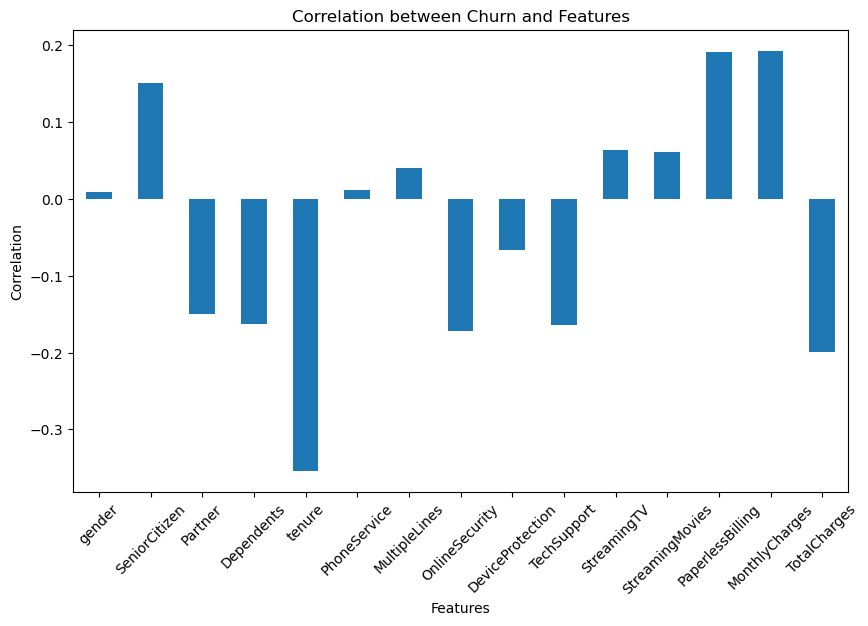

In [14]:
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title('Correlation between Churn and Features')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

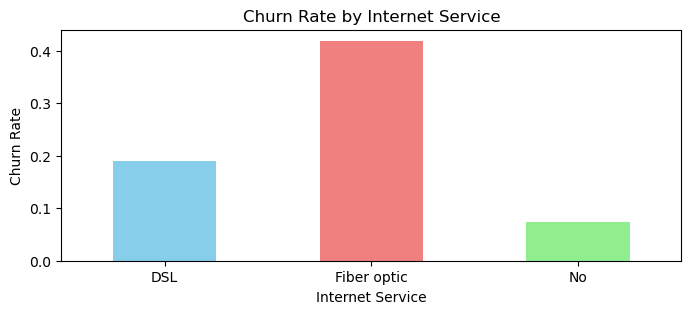

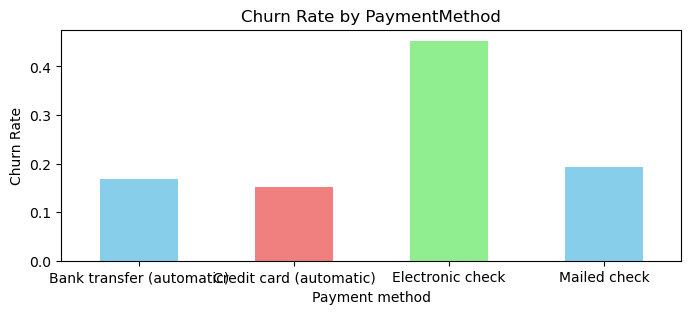

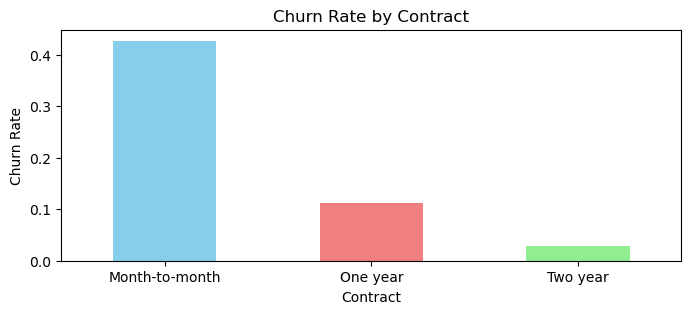

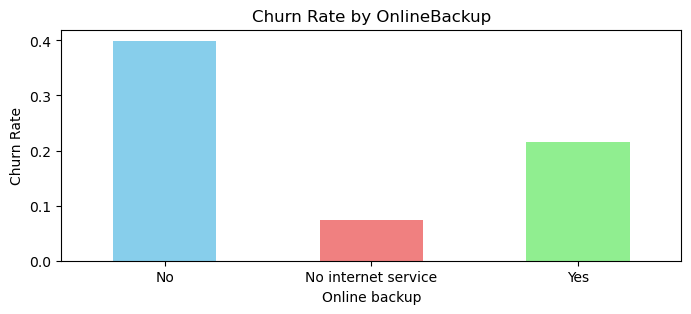

In [15]:
# Visualisation of categorical features and the label
# Group by features and calculate churn rates
churn_rates1 = df.groupby('InternetService')['Churn'].mean()
churn_rates2 = df.groupby('PaymentMethod')['Churn'].mean()
churn_rates3 = df.groupby('Contract')['Churn'].mean()
churn_rates4 = df.groupby('OnlineBackup')['Churn'].mean()

# Plot a grouped bar chart
plt.figure(figsize=(8, 3))
churn_rates1.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

# Plot a grouped bar chart
plt.figure(figsize=(8, 3))
churn_rates2.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Churn Rate by PaymentMethod')
plt.xlabel('Payment method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

# Plot a grouped bar chart
plt.figure(figsize=(8, 3))
churn_rates3.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Churn Rate by Contract')
plt.xlabel('Contract')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

# Plot a grouped bar chart
plt.figure(figsize=(8, 3))
churn_rates4.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Churn Rate by OnlineBackup')
plt.xlabel('Online backup')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()



In [16]:
# Defining a Function to Convert Objects to Int
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [17]:
df2 = df
df = df.apply(lambda x: object_to_int(x))

# features
X = df.drop(columns = ['Churn', 'gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies'])

# label
y = df['Churn'].values

In [18]:
# This is the feature set
X.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,2,0,0,0,1,2,29.85,29.85
1,0,0,0,34,0,1,0,1,0,1,0,3,56.95,1889.50
2,0,0,0,2,0,1,2,0,0,0,1,3,53.85,108.15
3,0,0,0,45,0,1,0,1,1,1,0,0,42.30,1840.75
4,0,0,0,2,1,0,0,0,0,0,1,2,70.70,151.65


<h2>Create a Test Set</h2>

In [19]:
# Scale the features set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a 70/30 training set, and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



<h2>Select and Train a Model</h2>

In [20]:
# Train the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Make prediction
y_pred_train = clf.predict(X_train)
# Training set Accuracy check
accuracy_train = accuracy_score(y_train, y_pred_train)
loss_train = log_loss(y_train, y_pred_train)
print("The training accuracy of the model is:", accuracy_train)
print("The training loss of the model is:", loss_train)

The training accuracy of the model is: 0.8006907761072735
The training loss of the model is: 7.183832583243382


In [22]:
# Test the model with the test set
y_pred_test = clf.predict(X_test)
# Test set accuracy chcek
accuracy_test = accuracy_score(y_test, y_pred_test)
loss_test = log_loss(y_test, y_pred_test)
print("The testing accuracy of the model is: ", accuracy_test)
print("The testing loss of the model is:", loss_test)

The testing accuracy of the model is:  0.7872037914691943
The testing loss of the model is: 7.669952782802654
